# Regresión polinomial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_auto=pd.read_csv("Datasets/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
data_auto.shape

(398, 9)

In [4]:
data_auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
data_auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
data_auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

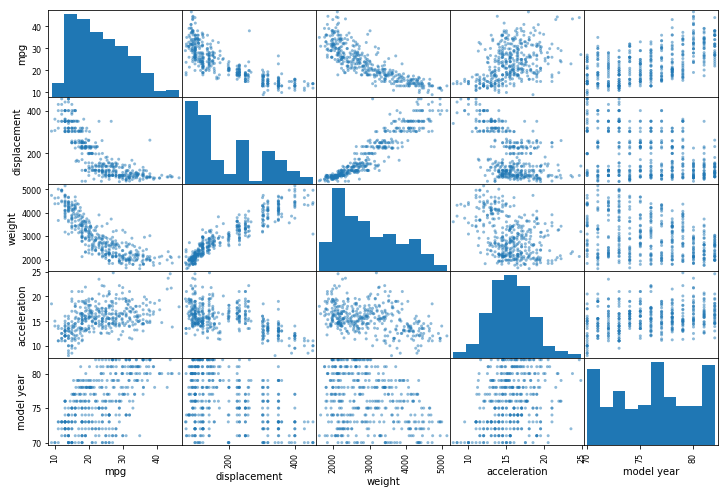

In [7]:
# Importamos la herramienta scatter matrix
from pandas.plotting import scatter_matrix
#Determinamos las columnas a considerar
attributes = ["mpg", "displacement", "horsepower", "weight", "acceleration", "model year"]
# Creamos el scatter matrix
scatter_matrix(data_auto[attributes], figsize=(12, 8))
plt.savefig('car_matrix.png')

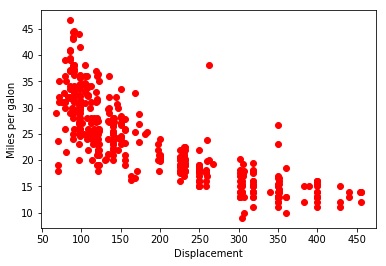

In [8]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()

### Regresión lineal

\begin{align*}
mpg=a+b*(displacement)
\end{align*}

In [9]:
X=np.array(data_auto.displacement).reshape(-1, 1)
Y=data_auto.mpg

In [10]:
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

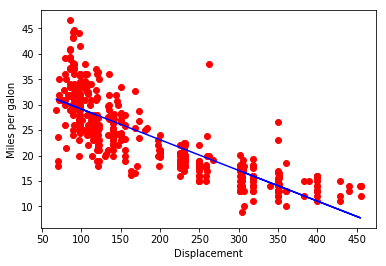

In [11]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.plot(X, lm.predict(X), color="blue")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()

In [12]:
lm.score(X,Y)

0.6467421834257859

In [13]:
SSD=sum((Y-lm.predict(X))**2)
RSE=np.sqrt(SSD/len(X-1))
error=RSE/np.mean(Y)
SSD, RSE, np.mean(Y), error

(8567.41185944304, 4.639629344124583, 23.514572864321615, 0.19730868048912079)

Por cada galón de gasolina se puede manejar por $23.5$ millas $\pm{4.64}$ millas, con un error del 19.7%

### Regresión cuadrática

\begin{align*}
mpg=a+b*(displacement)^2
\end{align*}

In [14]:
X2=X**2

In [15]:
lm2=LinearRegression()
lm2.fit(X2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm2.score(X2,Y)

0.5637812140272789

In [17]:
def resultados(x,y):
    SSD=sum((y-lm.predict(x))**2)
    RSE=np.sqrt(SSD/(len(x)-1))
    error=RSE/np.mean(y)
    print(SSD, RSE, np.mean(y), error)

In [18]:
resultados(X2,Y)

6793255447.476323 4136.601827440209 23.514572864321615 175.91651999414483


### Regresión polinomial cuadrática

\begin{align*}
mpg=a+b*(displacement)+c*(displacement)^2
\end{align*}

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [20]:
poly=PolynomialFeatures(degree=2)

In [21]:
X_2=poly.fit_transform(X)

In [22]:
lm_2=linear_model.LinearRegression()
lm_2.fit(X_2,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm_2.score(X_2,Y)

0.6884055108115619

In [24]:
lm_2.intercept_

42.208908092686805

In [25]:
lm_2.coef_

array([ 0.        , -0.1394425 ,  0.00017152])

In [26]:
def reg(x):
    return 42.209-0.1394425*x+0.00017152*x**2

In [27]:
reg(1)

42.069729020000004

In [28]:
x_lista=list(range(50,450))

In [29]:
y_valores=[]

for i in x_lista:
    y_valores.append(reg(i))
y_valores[:5]

[35.66567500000001,
 35.543556020000004,
 35.421780080000005,
 35.30034718,
 35.179257320000005]

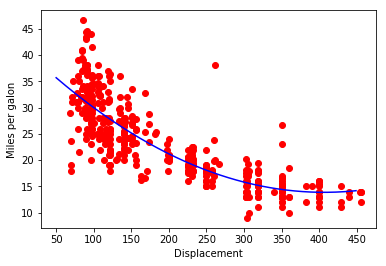

In [30]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.plot(x_lista, y_valores, color="blue")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()

In [31]:
grado=[2,3,4,5,6]
for d in grado:
    poly=PolynomialFeatures(degree=d)
    X_grado=poly.fit_transform(X)
    lm_grado=linear_model.LinearRegression()
    lm_grado.fit(X_grado,Y)
    print("Regresión de grado",d)
    print(lm_grado.score(X_grado,Y))
    print(lm_grado.intercept_)
    print(lm_grado.coef_)
    print("-"*70,"\n")

Regresión de grado 2
0.6884055108115619
42.208908092686805
[ 0.         -0.1394425   0.00017152]
---------------------------------------------------------------------- 

Regresión de grado 3
0.6894930357442586
44.955626061557936
[ 0.00000000e+00 -1.83963570e-01  3.73336556e-04 -2.70189953e-07]
---------------------------------------------------------------------- 

Regresión de grado 4
0.6895600958000124
46.4456474650511
[ 0.00000000e+00 -2.16122651e-01  6.03840636e-04 -9.30509108e-07
  6.50835779e-10]
---------------------------------------------------------------------- 

Regresión de grado 5
0.6899748396131915
38.19232729778915
[ 0.00000000e+00  1.12225958e-02 -1.67071619e-03  9.43896543e-06
 -2.11610443e-08  1.71478042e-11]
---------------------------------------------------------------------- 

Regresión de grado 6
0.6905361463113621
40.562946665696685
[ 0.00000000e+00 -2.86973780e-05 -2.35360014e-03  1.84827512e-05
 -6.47905857e-08  1.09059749e-10 -7.11019849e-14]
---------------

### Outliers

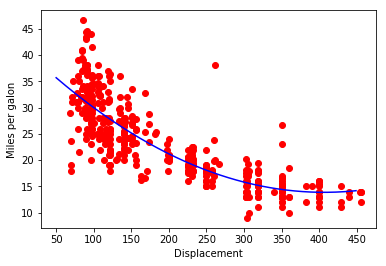

In [32]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.plot(x_lista, y_valores, color="blue")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()

Los **outliers** son aquellos valores que se encuentran alejados del comportamiento general de la distribución. De la gráfica se puede observar un punto en la parte central superior que sale por complemto de la nube de datos. Para poder indagar más, realizamos un filtrado sin almacenar, considerando aquellos desplazamientos mayores a 250, y millas por galón mayores a 35:

In [33]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
387,38.0,6,262.0,85,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


El mismo procedimiento lo podemos realizar para todos aquellos valores que consideremos están saliendo del comportamiento estandar de la distribución de datos:

In [34]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
251,20.2,8,302.0,139,3570,12.8,78,1,mercury monarch ghia
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls


In [35]:
data_auto[(data_auto["displacement"]<150)&(data_auto["mpg"]>40)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
244,43.1,4,90.0,48,1985,21.5,78,2,volkswagen rabbit custom diesel
309,41.5,4,98.0,76,2144,14.7,80,2,vw rabbit
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
325,44.3,4,90.0,48,2085,21.7,80,2,vw rabbit c (diesel)
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup


En este caso, se opta por eliminar los valores de la distribución para recalcular la regresión:

In [36]:
data_auto.shape

(398, 9)

In [37]:
data_auto.drop([244,251,298,309,322,324,325,326,329,330,364,387,394], inplace=True)
data_auto.shape

(385, 9)

In [38]:
X=np.array(data_auto.displacement).reshape(-1, 1)
Y=data_auto.mpg

grado=[2]
for d in grado:
    poly=PolynomialFeatures(degree=d)
    X_grado=poly.fit_transform(X)
    lm_grado=linear_model.LinearRegression()
    lm_grado.fit(X_grado,Y)
    print("Regresión de grado",d)
    print(lm_grado.score(X_grado,Y))
    print(lm_grado.intercept_)
    print(lm_grado.coef_)
    print("-"*70,"\n")

Regresión de grado 2
0.7336234378351756
40.72439140711846
[ 0.         -0.12918126  0.00015268]
---------------------------------------------------------------------- 



In [39]:
def reg2(x):
    return 40.7244-0.12918*x+0.00015268*x**2

In [40]:
x2_lista=list(range(50,450))

y2_valores=[]

for i in x_lista:
    y2_valores.append(reg(i))
y2_valores[:5]

[35.66567500000001,
 35.543556020000004,
 35.421780080000005,
 35.30034718,
 35.179257320000005]

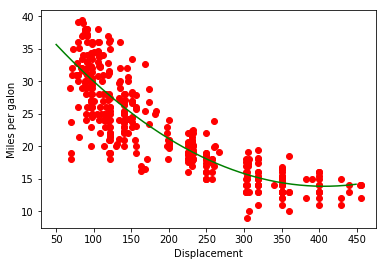

In [41]:
plt.plot(data_auto["displacement"],data_auto["mpg"], "ro")
plt.plot(x2_lista, y2_valores, color="green")
plt.xlabel("Displacement")
plt.ylabel("Miles per galon")
plt.show()